# Computational Drug Discovery Project - Ligand Based Drug Design [Part5] Regression Models

Perform dataset preparation and regression models

We used non-linear regression algorithms to build QSAR models and predict the bioactivities of compounds.

## QSAR Models

QSAR models are mathematical models that can be used to study quantitative mapping and predict the physicochemical, biological, and environmental fate properties of compounds from the knowledge of their chemical structure.

-------------------------------------------------------------------------------------------------------------------

### Preparing the X and Y Data Matrices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import model_selection
from collections import defaultdict

#### X data matrix

In [2]:
df = pd.read_csv('PPARa_fp_morgan.csv')
df

,smiles,bit0,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,...,bit2038,bit2039,bit2040,bit2041,bit2042,bit2043,bit2044,bit2045,bit2046,bit2047
0,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCO[C@@H](Cc1ccc(OCCn2c3ccccc3c3cc(Br)ccc32)cc...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)[C@H](Cc1ccccc1)Oc1ccc(C(F)(F)F)cc1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cc1ccc(-c2nc(C)c(C(=O)N[C@H]3CCCN(c4cccc(C(=O)...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CCc1ccc(O[C@H](C)CCOc2ccc(CCC(=O)O)c(C)c2)c(C(...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,CC(C)(C)OC(=O)NC(CSCc1ccc(C(=O)c2ccc([N+](=O)[...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1670,CC(C)(C)OC(=O)NC(COCc1ccc(-c2ccccc2)cc1)C(=O)O,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1671,CC(SCc1ccccc1)C(NC(=O)c1ccccc1)C(=O)O,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1672,CC(C)(C)OC(=O)NC(COCc1ccc(Cc2ccccc2)cc1)C(=O)O,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
X = df.drop('smiles', axis=1)
X

,bit0,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,bit9,...,bit2038,bit2039,bit2040,bit2041,bit2042,bit2043,bit2044,bit2045,bit2046,bit2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1670,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1671,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1672,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Y variable

In [5]:
df2 = pd.read_csv('ppara_bioactivity_data_ro5.csv')
df2

,Unnamed: 0,molecule_chembl_id,canonical_smiles,type,pChEMBL,MW,LogP,NumHDonors,NumHAcceptors,#RO5 Violations
0,0,CHEMBL15594,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)O,['IC50'],5.920819,304.474,6.21670,1.0,1.0,1.0
1,1,CHEMBL167430,CCO[C@@H](Cc1ccc(OCCn2c3ccccc3c3cc(Br)ccc32)cc...,['pEC50' 'EC50'],5.619930,482.374,5.66820,1.0,4.0,1.0
2,2,CHEMBL192518,O=C(O)[C@H](Cc1ccccc1)Oc1ccc(C(F)(F)F)cc1,['EC50' 'pEC50'],6.300686,310.271,3.78010,1.0,2.0,0.0
3,3,CHEMBL1934484,Cc1ccc(-c2nc(C)c(C(=O)N[C@H]3CCCN(c4cccc(C(=O)...,['EC50'],8.221849,435.549,4.52394,2.0,5.0,0.0
4,4,CHEMBL212911,CCc1ccc(O[C@H](C)CCOc2ccc(CCC(=O)O)c(C)c2)c(C(...,['IC50'],5.370896,460.570,6.04202,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1669,1669,CHEMBL5194126,CC(C)(C)OC(=O)NC(CSCc1ccc(C(=O)c2ccc([N+](=O)[...,EC50,5.318759,460.508,4.03690,2.0,7.0,0.0
1670,1670,CHEMBL5194570,CC(C)(C)OC(=O)NC(COCc1ccc(-c2ccccc2)cc1)C(=O)O,EC50,5.142668,371.433,3.84810,2.0,4.0,0.0
1671,1671,CHEMBL5207420,CC(SCc1ccccc1)C(NC(=O)c1ccccc1)C(=O)O,EC50,5.040959,329.421,3.19150,2.0,3.0,0.0
1672,1672,CHEMBL5186824,CC(C)(C)OC(=O)NC(COCc1ccc(Cc2ccccc2)cc1)C(=O)O,EC50,5.000000,385.460,3.77190,2.0,4.0,0.0


In [6]:
Y = df2.pChEMBL
Y

0       5.920819
1       5.619930
2       6.300686
3       8.221849
4       5.370896
          ...   
1669    5.318759
1670    5.142668
1671    5.040959
1672    5.000000
1673    4.917215
Name: pChEMBL, Length: 1674, dtype: float64

### Remove low variance features

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

### Data split (70/30 ratio)

In [8]:
#Data split (70/30 ratio)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [9]:
X_train=pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,1,1,0,0,...,1,0,0,1,0,1,0,1,0,1
2,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,0,1,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,0
1167,1,0,0,0,1,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1
1168,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,0,1,0,0,1,1
1169,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [10]:
X_test=pd.DataFrame(X_test)
X_test

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,1,...,1,0,1,0,0,0,0,1,0,1
2,0,1,0,0,0,0,0,0,1,1,...,0,1,1,0,0,0,0,0,1,0
3,0,1,0,1,0,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,0,0,0,0,1,1,0,1,1,1,...,0,1,1,0,0,0,0,1,0,1
499,0,1,0,0,1,0,0,1,1,1,...,0,1,0,0,1,1,0,0,0,1
500,0,0,1,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,1,0,0
501,0,0,0,0,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0


### Perform PCA 

In [11]:
X_train2 = X_train.assign(data_set="training")
X_train2

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,data_set
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,training
1,1,0,0,0,1,0,1,1,0,0,...,0,0,1,0,1,0,1,0,1,training
2,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,training
3,1,1,0,1,0,0,0,1,0,1,...,0,0,1,1,0,0,0,1,0,training
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,0,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,training
1167,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,1,0,1,training
1168,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,1,0,0,1,1,training
1169,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,training


In [12]:
X_test2 = X_test.assign(data_set="test")
X_test2

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,data_set
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
1,0,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,test
2,0,1,0,0,0,0,0,0,1,1,...,1,1,0,0,0,0,0,1,0,test
3,0,1,0,1,0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,test
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,0,0,0,0,1,1,0,1,1,1,...,1,1,0,0,0,0,1,0,1,test
499,0,1,0,0,1,0,0,1,1,1,...,1,0,0,1,1,0,0,0,1,test
500,0,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,test
501,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,test


In [13]:
df3 = pd.concat([X_train2,X_test2], axis = 0)
df3

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,data_set
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,training
1,1,0,0,0,1,0,1,1,0,0,...,0,0,1,0,1,0,1,0,1,training
2,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,training
3,1,1,0,1,0,0,0,1,0,1,...,0,0,1,1,0,0,0,1,0,training
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,0,0,0,0,1,1,0,1,1,1,...,1,1,0,0,0,0,1,0,1,test
499,0,1,0,0,1,0,0,1,1,1,...,1,0,0,1,1,0,0,0,1,test
500,0,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,test
501,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,test


In [14]:
# Standardize the Data
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df3.iloc[:, 0:51].values
# Separating out the target
y = df3.loc[:,['data_set']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [15]:
# PCA Projection to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [16]:
df3 = df3.reset_index()
finalDf = pd.concat([principalDf, df3[['data_set']]], axis =1 )

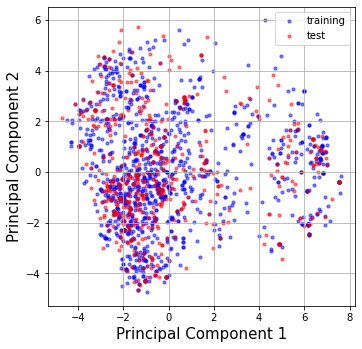

In [17]:
# Visualize 2D Projection
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5.5,5.5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

targets = ['training', 'test']
colors = ['blue','red']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['data_set'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10, alpha=0.5)
ax.legend(targets)
ax.grid()
fig.savefig('plot_dataset73_PCA_A.jpg')

## Building a Regression Model

## Random Forest Regression

In [18]:
#Building a Regression Model using Random Forest
# Training set
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
X_pred = model.predict(X_train)
R2= r2_score(Y_train, X_pred)
R2

0.9128902838620904

In [19]:
RMSE=mean_squared_error(Y_train, X_pred)
RMSE

0.1476218205567803

In [20]:
# External set
pred = model.predict(X_test)
Q2 = r2_score(Y_test, pred)
Q2

0.6136805824029599

In [21]:
RMSE2=mean_squared_error(Y_test, pred)
RMSE2

0.5877572605284824

### Experimental vs Predicted pChEMBL Values

/Users/jen-tzu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/jen-tzu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/jen-tzu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jen-tzu/opt/anaco

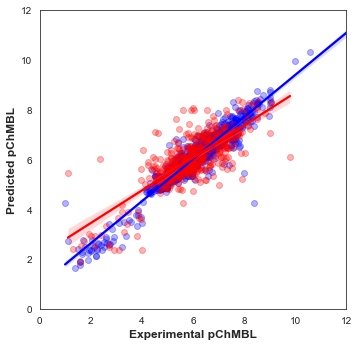

In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pylab as py 
import statsmodels.api as sm


sns.set_style("white")

ax = sns.regplot(Y_train, X_pred, scatter_kws={'alpha':0.3},color="blue")
ax = sns.regplot(Y_test, pred, scatter_kws={'alpha':0.3},color="red")
ax.set_xlabel('Experimental pChMBL', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pChMBL', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)

ax.figure.set_size_inches(5.5, 5.5)
plt.show
plt.savefig('plot_morgan_ml_A.pdf')

## Histogram Gradient Boosting Regression

In [23]:
from sklearn.experimental    import enable_hist_gradient_boosting
from sklearn.ensemble        import HistGradientBoostingRegressor
model_h =  HistGradientBoostingRegressor()
model_h.fit(X_train, Y_train)
X_preh = model_h.predict(X_train)
R2_h= r2_score(Y_train, X_preh)
R2_h

/Users/jen-tzu/opt/anaconda3/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


0.8521668552371342

## KNeighbors Regression

In [24]:
from sklearn.neighbors import KNeighborsRegressor
model_k = KNeighborsRegressor(n_neighbors=2)
model_k.fit(X_train, Y_train)
X_prek = model_k.predict(X_train)
R2_k= r2_score(Y_train, X_prek)
R2_k

0.8273331230265508

## Multilayer Perceptron Regression

In [25]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
model_m = MLPRegressor(hidden_layer_sizes=(300,), max_iter=100)
model_m.fit(X_train, Y_train)
X_prem = model_m.predict(X_train)
R2_m= r2_score(Y_train, X_prem)
R2_m

/Users/jen-tzu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7183429572771336

## Support Vector Regression

In [26]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
model_s = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model_s.fit(X_train, Y_train)
X_pres = model_s.predict(X_train)
R2_s= r2_score(Y_train, X_pres)
R2_s

0.7259226326597923